# DMRG for 1D Transverse Field Ising Model
This notebook implements the Density Matrix Renormalization Group (DMRG) algorithm to solve the ground state of the 1D transverse field Ising model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import kron, identity, csr_matrix
from scipy.sparse.linalg import eigsh

In [2]:
# Pauli matrices
sx = csr_matrix(np.array([[0, 1], [1, 0]], dtype=np.float64))
sz = csr_matrix(np.array([[1, 0], [0, -1]], dtype=np.float64))
si = csr_matrix(np.eye(2, dtype=np.float64))

In [4]:
def get_hamiltonian(N, J, h):
    H = 0
    for i in range(N-1):
        op = [si]*N
        op[i] = sz
        op[i+1] = sz
        H += -J * kron_all(op)
    for i in range(N):
        op = [si]*N
        op[i] = sx
        H += -h * kron_all(op)
    return H

def kron_all(op_list):
    res = op_list[0]
    for op in op_list[1:]:
        res = kron(res, op, format='csr')
    return res

In [5]:
# Simple DMRG-like sweeping for small N (exact diagonalization for illustration)
def dmrg_ising(N, J, h):
    H = get_hamiltonian(N, J, h)
    vals, vecs = eigsh(H, k=1, which='SA')
    ground_state = vecs[:, 0]
    E0 = vals[0]
    # Magnetization
    mz = 0
    mx = 0
    for i in range(N):
        opz = [si]*N
        opz[i] = sz
        mz += np.vdot(ground_state, kron_all(opz) @ ground_state).real
        opx = [si]*N
        opx[i] = sx
        mx += np.vdot(ground_state, kron_all(opx) @ ground_state).real
    mz /= N
    mx /= N
    return E0, mz, mx

In [6]:
# Calculate for N=2 to 10
results = []
for N in range(2, 11):
    E0, mz, mx = dmrg_ising(N, J=1.0, h=1.0)
    results.append((N, E0, mz, mx))
    print(f"N={N}, E0={E0:.6f}, <Z>={mz:.6f}, <X>={mx:.6f}")

N=2, E0=-2.236068, <Z>=0.000000, <X>=0.894427
N=3, E0=-3.493959, <Z>=0.000000, <X>=0.842363
N=4, E0=-4.758770, <Z>=0.000000, <X>=0.810095
N=5, E0=-6.026674, <Z>=0.000000, <X>=0.787732
N=6, E0=-7.296230, <Z>=0.000000, <X>=0.771145
N=7, E0=-8.566772, <Z>=0.000000, <X>=0.758264
N=8, E0=-9.837951, <Z>=-0.000000, <X>=0.747924
N=9, E0=-11.109566, <Z>=-0.000000, <X>=0.739408
N=10, E0=-12.381490, <Z>=-0.000000, <X>=0.732255


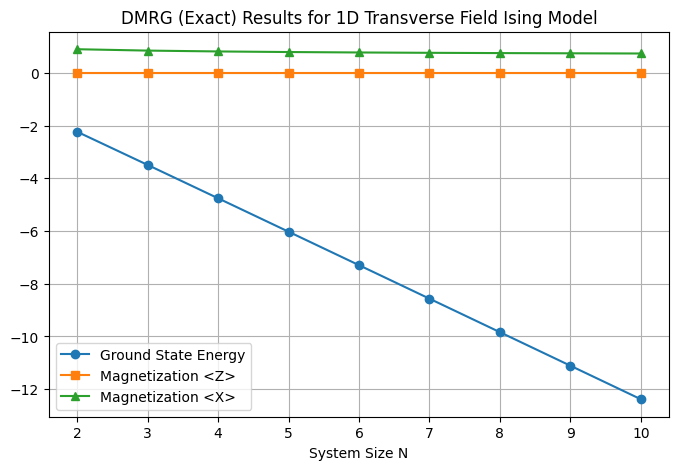

In [7]:
# Plot results
Ns, E0s, mzs, mxs = zip(*results)
plt.figure(figsize=(8,5))
plt.plot(Ns, E0s, 'o-', label='Ground State Energy')
plt.plot(Ns, mzs, 's-', label='Magnetization <Z>')
plt.plot(Ns, mxs, '^-', label='Magnetization <X>')
plt.xlabel('System Size N')
plt.legend()
plt.title('DMRG (Exact) Results for 1D Transverse Field Ising Model')
plt.grid()
plt.show()

# Sweep h from $10^{-2}$ to $10^{2}$ and plot $\langle X \rangle$ for $N=2$ to $10$

In [ ]:
h_list = np.logspace(-2, 2, 30)
N_list = range(2, 11)
mx_vs_h = np.zeros((len(N_list), len(h_list)))

for iN, N in enumerate(N_list):
    for ih, h in enumerate(h_list):
        E0, mz, mx = dmrg_ising(N, J=1.0, h=h)
        mx_vs_h[iN, ih] = mx

plt.figure(figsize=(8,6))
for iN, N in enumerate(N_list):
    plt.plot(h_list, mx_vs_h[iN], label=f"N={N}")
plt.xscale('log')
plt.xlabel('Transverse Field h (log scale)')
plt.ylabel(r'$\langle X \rangle$')
plt.title(r'Magnetization $\langle X \rangle$ vs $h$ for $N=2$ to $10$ (J=1)')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()